# Evaluating Machine Learning Models

Once we have a machine learning model, how do we report how well it performs?  We need some way
to measure this.

Reminders:

- Recall that models are only useful if they generalize well to unseen data.

- Importance of train/test split: we know that it's important to have separate data for training and testing (more
on this later).

- The problem of overfitting: model performs well on training data but poorly on new data.

- Need for validation data for model tuning.

# Train/Test/Validation Splits

- Training set: used to fit the model.

- Validation set: used for hyperparameter tuning.

  - What is a hyperparameter?  A variable that controls something in your ML model that is *not* set during
    training.  For instance, in a neural network, all the $W$'s and $b$'s are *parameters*, because their correct
    values are found during training of the neural network (during backpropagation/gradient descent).  However, the number of layers
    in the network and the sizes of each layer are *fixed* once this process starts, and so backprop/gradient descent
    will not find optimal values for these variables, unlike the $W$ and $b$ variables.  Therefore, the number of layers
    and the size of each layer are *hyperparameters*.

  - Another example: Imagine the following situation: you are training a model with linear regression, but you don't know what features to use.  (This might be because you have a large set of features that you need to cut down, or maybe you think you might need to create some new features through feature engineering.)  

    In this situation, you might need to create a bunch of different linear regression models with different combinations of features and evaluate how well they do.  If you simply use a single training set and a single testing set in this situation (and therefore evaluate all the different models using the same testing set), you are effectively now using the testing set for training.  This is because presumably you will choose the model from all the possible models you create that performs best on the testing data.  But that's exactly what we're trying to avoid --- having any overlap between the data we're using to create the model and the data we use to evaluate how well the model is doing.  (And here, "creating" the model also includes picking what features to use.)

- Test set: held out for final evaluation.

## Sizes of these sets:

- Deciding the sizes of these sets is very problem-specific and will often depend on how much data you have.

- At the heart of the matter is the trade-off between wanting to use as much data as possible for training (because
usually training with more data will result in a better classifier), while holding enough for testing to be confident
that your testing set is still large/robust enough to give a good estimate of the accuracy of your classifier on 
unseen data.


- If you have plenty of data, a common idea is to use 80% of your data for training and 20% for testing.  If you need
a validation set, a common split is 80/10/10 or 70/15/15.  If you really have tons of data, some people recommend
a 2/3 vs 1/3 split between training and testing.

- On the other hand, if you don't have enough data to make each subset of data large enough to be meaningful, you
can use **cross-validation**, described below.


## Evaluation metrics

- There are various numerical ways to measure the performance of our machine learning models.

- These generally correspond to our cost functions, $J(w)$, for whatever model we are using, though there
are others.

### Regression metrics

- For regression problems (predicting a number), we can use **mean squared error** (which we use to train
linear regression):

$$\text{MSE} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2$$

but this is not the only metric we can use.

- Some people recommend the **mean absolute error**:

$$\text{MAE} = \frac{1}{m} \sum_{i=1}^m \left\vert \hat{y}^{(i)} - y^{(i)} \right\vert$$

One advantage MAE has is the quantity is more "interpretable" in that it has the same units as the target
value $y$.  For example, if we are predicting housing prices in dollars, then the MAE tells us, on average, how
far away our predictions are from the "true" price of a house.  On the other hand, MSE gives us a value 
in "square dollars" which is harder to interpret.

- We can also take the square root of the mean squared error to get the **root-mean-square error**:

$$\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{ \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 }$$

This metric also has the property that the units match the units of $y$, though some people still recommend
MAE over RMSE.

- There is one more common metric, known as **mean absolute percentage error**:

$$\text{MAE} = \frac{1}{m} \sum_{i=1}^m \left\vert \dfrac{\hat{y}^{(i)} - y^{(i)}}{y^{(i)}} \right\vert$$

This metric has the advantage that it will always be between 0 and 1, and therefore can be 
interpreted as a percentage.

<hr>

For all of these metrics, lower numbers indicate better predictions.

- $R^2$ (coefficient of determination): This one is a bit different, in that higher values are better, but you might be more familiar with
  this one, and many other people (non-ML people) know it as well.

If ${\displaystyle {\bar {y}}}$ is the mean of the observed data, then we define the sum of the squares
of residuals:

$SS_{res} = \displaystyle \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2$

$SS_{tot} = \displaystyle \sum_{i=1}^m (\bar{y} - y^{(i)})^2$

And then, $R^2 = \displaystyle 1 - \frac{SS_{res}}{SS_{tot}}$


In the best case, the predicted values exactly match the observed values, which results in 
${\displaystyle SS_{\text{res}}=0}$ and $R^2 = 1$. A baseline model, which always predicts $\bar{y}$, will have $R^2 = 0$.

### Classification metrics

For binary classification problems, we can use any of the metrics above with 0 and 1 for our target
variable $y$.  For $\hat{y}$, we can use 0 or 1 if our model directly predicts the class, or if the model
predicts a probability between 0 and 1, we can use that as well.

However, there are a number of more common metrics:

- **Accuracy** is probably the simplest and most common.  It just measures the number of values
predicted correctly divided by the total number of values.

Accuracy, however, can be misleading when the number of data points in each of our classes
is unbalanced.  Consider an example where we have 100 data points, but 95 of them are from the positive
class and only 5 are from the negative class.  Assume we have a machine learning model that always 
predicts the positive class ($f(x) = 1$), no matter what $x$ is.  The accuracy of this model
will be 95%, but obviously it will always miss predictions for the negative class, which probably isn't
very useful.

We have a few ways to make better metrics:

Let's assume our classification problem is trying to predict whether someone has a disease or not.  
We build a binary classifier for this and will predict either 1 (has the disease) or 0 (does not 
have the disease).  There are some standardized terms we can use:

- A **true positive** is predicting 1 (has the disease) when the patient does have the disease.
- A **true negative** is prediction 0 (does not have the disease) when the patient does not have the disease.
- A **false positive** is predicting 1 when the patient does **not** have the disease.
- A **false negative** is predicting 0 when the patient **does** have the disease.

We will use TP, TN, FP, and FN as abbreviations for the total number of these occurrences in a data set.

### Confusion matrix:

```
-------------------
|        |        |
|   TP   |   FN   |
|        |        |
|--------|--------|
|        |        |
|   FP   |   TN   |
|        |        |
-------------------
```

A few common metrics using these values are:

- **True positive rate (TPR)**: $\dfrac{TP}{TP+FN}$.  Also called sensitivity.

- **True negative rate (TNR)**: $\dfrac{TN}{TN+FP}$.  Also called specificity.

- **Balanced accuracy** = $\dfrac{TPR + TNR}{2}$

- **(regular) accuracy** = $\dfrac{TP+TN}{TP+FP+TN+FN}$

Sensitivity and specificity are often used in the medical world. 
In ML, we also often use:

- **Precision** = $\dfrac{TP}{TP+FP}$.

- **Recall** = $\dfrac{TP}{TP+FN}$.  Note this is the same thing as sensitivity = true positive rate.

- **F1 Score** = harmonic mean of precision and recall = $2\dfrac{Prec \cdot Recall}{Prec + Recall}$

### When to Use Sensitivity/Specificity
Use when you care about actual condition detection (usually in medical, diagnostic, or screening settings):

- Sensitivity is vital if missing a positive case is dangerous (e.g., cancer detection).

- Specificity matters if you want to avoid false alarms (e.g., misdiagnosing healthy patients).

Example: Disease Screening

- Sensitivity tells you: Of all people who actually have the disease, how many did we correctly find?

- Specificity tells you: Of all people who are healthy, how many did we correctly ignore?

### When to Use Precision/Recall
Use when you care about how useful or trustworthy the model's positive predictions are, especially in imbalanced datasets.

- Precision is important when false positives are costly (e.g., spam filters, fraud alerts).

- Recall is crucial when missing a true positive is bad (e.g., catching all fraud cases).

 Example: Spam Filtering

- Precision: Of all emails marked spam, how many really were spam?

- Recall: Of all spam emails, how many did we catch?

## Receiver Operating Characteristic (ROC) curve

In many classification problems, we can pick a *threshold* value that defines the boundary between
the 0 class and the 1 class.  For example, for classifiers that output probabilities, like
logistic regression or neural networks with sigmoid activation, we typically pick 0.5 as the threshold, but
there's no reason that we *must* do that.  We can pick any probability we want, and it is common to use a different
threshold in situations where we know misclassifications in one direction or the other might be very bad (consider
spam classification vs medical diagnosis).

A **receiver operating characteristic curve, or ROC curve**, is a graphical plot that illustrates the performance of a binary classifier model at varying threshold values. 

The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR) at each threshold setting.

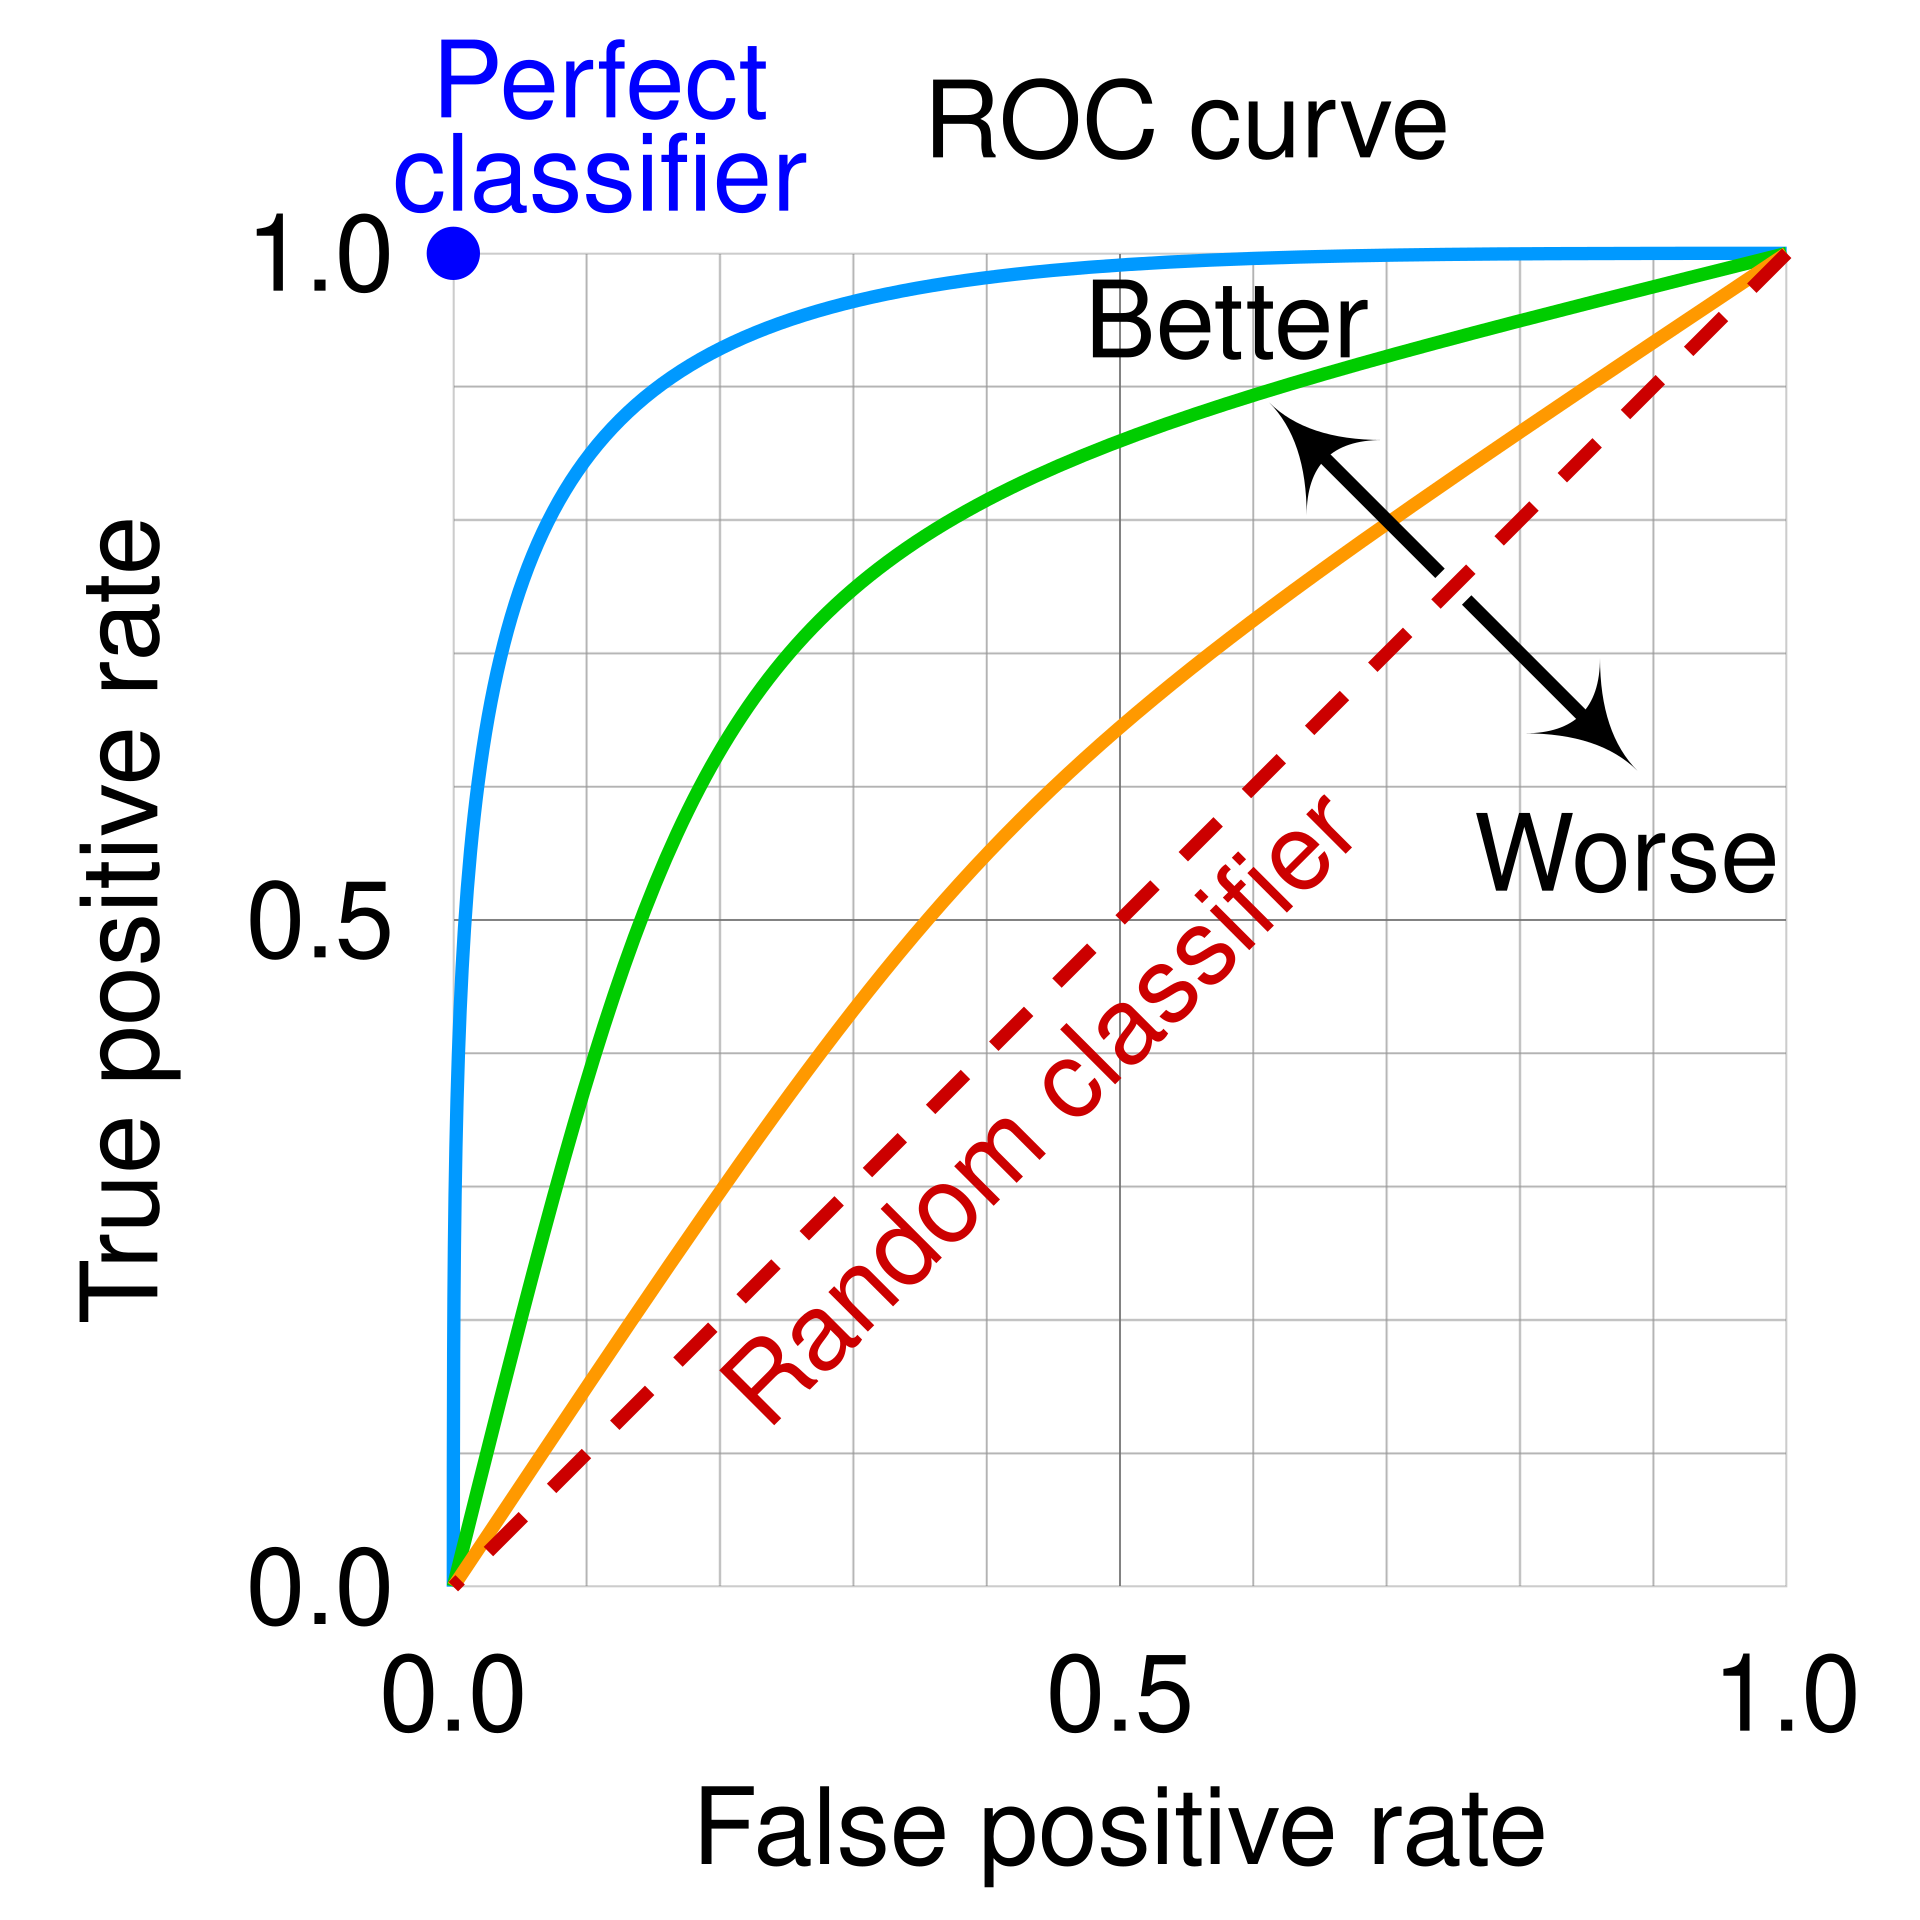

## What if I don't have enough data?

While large data sets are now common in machine learning, we don't always have enough data to split
the data set into a large enough subset to train on, plus a large enough set to test on as well.  Or,
even if we do have enough data, we know that training a model on **more** data almost always results in a
better model, so it seems silly to let 1/3 or 20% of our data "go to waste" and not use it for training.

A common solution to this is called **cross-validation**, and there are a few ways to do it:

- **$k$-fold cross-validation**: This is a nice method if you have a pretty big data set but you don't feel like you can hold back 1/3 or 20% of it for testing.

  We will partition the entire data set into $k$ equally-sized subsets.  Of the $k$ subsets, we choose one of them to be the testing set, and the other $k-1$ subsets combined will form the training set.  We train our model on the training set and test it on the testing set as normal.  Then, we repeat this process but **using a different subset of the original $k$ subsets for the testing set**.  We will usually then average all the evaluations from each of the $k$ individual training/testing cycles.

  Example: In 10-fold cross validation (common), we divide our entire set into 10 roughly equal sized subsets.
  Then, we cycle through the training/testing process while keeping one of the subsets as our testing set and nine
  of them (combined) as our training set.
  
  (Note: typically we must make sure to do this partitioning of the original data in such a way that the output labels/predictions in each subset match the overall distribution of the labels/predictions).
  
- **Leave $p$ out cross-validation**: This is even more extreme than $k$-fold cross validation, but
is nice when your data set is very small.  

  In this method, we remove $p$ data points from the data set and use only those $p$ points for testing. The rest of the data is used for training.  We repeat this process with every possible set of $p$ data points from the original data, and average all of the evaluations on the different testing sets.
  
  This method quickly becomes unwieldy for large values of $p$, but it is very commonly used with $p=1$, or **leave-one-out cross-validation (LOOCV)**.  Here, we cycle through our entire data set and use each individual data point in turn as the sole member of the testing set, training on all the rest of the data except that one point.  We average all the results.
  
<hr>

<b>The key idea in all of these methods is that we never use the same data point in both the testing and training sets.</b>